# Construcción de un modelo estadístico base

### Librerías Utilizadas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import statsmodels.api as sm
import pylab as py
import scipy.stats as stats


from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from scipy.stats import anderson
from statsmodels.graphics.gofplots import qqline
from scipy.stats import ttest_1samp
from sklearn.preprocessing import PowerTransformer
import statsmodels.formula.api as smf

### Importamos los datos

Las variables que se eligieron en la entrega anterior fueron: 

- cylindernumber
- curbweight
- enginesize
- horsepower
- citympg
- highwaympg

El dataframe a continuación contará con dichas variables junto con 'Price'. La intención del modelo es poder predecir los valores de price utilziando una Regresión Lineal.

In [2]:
df = pd.read_csv('precios_autos-2.csv')
df = df.drop(['symboling','CarName','fueltype','carbody','drivewheel','enginelocation','wheelbase','carlength','carwidth','carheight','enginetype','stroke','compressionratio','peakrpm'], axis=1)
df.head()

,curbweight,cylindernumber,enginesize,horsepower,citympg,highwaympg,price
0,2548,four,130,111,21,27,13495.0
1,2548,four,130,111,21,27,16500.0
2,2823,six,152,154,19,26,16500.0
3,2337,four,109,102,24,30,13950.0
4,2824,five,136,115,18,22,17450.0


In [3]:
# asignamos valor numerico a variable categorica cylindernumber

numeros = ['zero','one','two','three','four','five','six','seven','eight','nine','ten','eleven','twelve']

for i in range(len(df['cylindernumber'])):
    for j in range(len(numeros)):
        if df['cylindernumber'][i] == numeros[j]:
            df['cylindernumber'][i] = int(j)

#df.to_csv('precios_autos_limpio.csv')

/var/folders/cw/ht0d2msj3sv3rrnq3tqsr2480000gn/T/ipykernel_8925/702694225.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cylindernumber'][i] = int(j)
/var/folders/cw/ht0d2msj3sv3rrnq3tqsr2480000gn/T/ipykernel_8925/702694225.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cylindernumber'][i] = int(j)
/var/folders/cw/ht0d2msj3sv3rrnq3tqsr2480000gn/T/ipykernel_8925/702694225.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-co

Ahora se normalizarán los datos con la intención de hacer una regresión. Esto debido a que en la entrega anterior claramente se veía en la matriz de dispersión que había mucho ruido en los datos, por lo que se optó por normalizarlos para reducir dicho ruido.

In [4]:
d_cuantitativo = df.drop(columns=['cylindernumber'])
power = PowerTransformer(method='yeo-johnson', standardize=True)
d_cuantitativo = power.fit_transform(d_cuantitativo)

datos = pd.DataFrame(d_cuantitativo, columns=['curbweight', 'enginesize', 'horsepower', 'citympg','highwaympg', 'price'])
datos = datos.join(df['cylindernumber'])
datos.head()

,curbweight,enginesize,horsepower,citympg,highwaympg,price,cylindernumber
0,0.144823,0.380332,0.466122,-0.586744,-0.487338,0.468027,4
1,0.144823,0.380332,0.466122,-0.586744,-0.487338,0.826806,4
2,0.647098,0.890484,1.286257,-0.977418,-0.652500,0.826806,6
3,-0.303501,-0.294503,0.226519,-0.065280,-0.020113,0.530368,4
4,0.648780,0.535529,0.562854,-1.188336,-1.369687,0.918904,5


### Matriz de dispersión

En el documento entregado anteriormente se mostraron cada uno de los datos que son atípicos del dataframe. Ahora, se volverán a mostrar pero utilizando una matriz de dispersión.

In [5]:
fig = px.scatter_matrix(datos, width=1300, height=1500)
fig.update_layout({"xaxis"+str(i+1): dict(tickangle = -90) for i in range(13)})
fig.update_traces(diagonal_visible=False)
fig.show()

Observamos que la mayoría de los datos siguen una regresión lineal entre ellos, con excepción de cylindernumber ya que es una variable categórica. Igualmente, observamos que para el grán número de datos (205 datos), la mayoría no cuenta con una cantidad significante de valores atípicos, por lo que no se eliminarán para la primera modelación y, en caso de ser necesario, se eliminarán y se volverá a modelar los datos sin estos valores atípicos.

### Regresión Lineal Múltiple

La razón por la que se eligió la regresión lineal es porque en la Matriz de Dispersión anterior se puede observar como los datos en su mayoría siguen una tendencia lineal, por lo que se quiere verificar si este es el caso. Para esto, se hará la implementación del modelo y después se hará una verificación del modelo.

In [6]:
# descripción de los datos

datos.describe()

,curbweight,enginesize,horsepower,citympg,highwaympg,price
count,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02
mean,2.197483e-14,-6.809079e-14,4.570869e-15,7.332888e-16,-1.998401e-16,-2.752053e-14
std,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00
min,-3.063303e+00,-3.524894e+00,-2.542589e+00,-2.453799e+00,-2.674189e+00,-2.068027e+00
25%,-7.717206e-01,-8.083325e-01,-1.001606e+00,-9.774182e-01,-8.229150e-01,-7.792298e-01
50%,-1.326370e-01,8.787306e-02,1.537342e-02,-6.527978e-02,-2.011275e-02,-9.242221e-02
75%,8.298171e-01,6.549486e-01,5.861970e-01,8.057295e-01,5.467091e-01,8.271105e-01
max,2.203852e+00,2.521759e+00,2.463899e+00,2.712571e+00,2.754107e+00,2.080857e+00


In [7]:
X = datos.drop(columns=['price'])
y = datos['price']


# crear las variables de entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [8]:
# crear el modelo

model = LinearRegression()
model.fit(X_train,y_train) 

LinearRegression()

In [9]:
# predecir los valores de price

predictions = model.predict(X_test)

In [10]:
# imprimimos los valores de los coeficientes

print('Beta_0 = ', model.intercept_)
print('Beta_1 = ', model.coef_[0])
print('Beta_2 = ', model.coef_[1])
print('Beta_3 = ', model.coef_[2])
print('Beta_4 = ', model.coef_[3])
print('Beta_5 = ', model.coef_[4])
print('Beta_6 = ', model.coef_[5])

Beta_0 =  -0.2917570402113102
Beta_1 =  0.7138340816503939
Beta_2 =  -0.11988796735538904
Beta_3 =  0.3468051567359563
Beta_4 =  -0.1806328184216576
Beta_5 =  0.23204129522058725
Beta_6 =  0.06942266903257821


Con los resultados arrojados anteriormente, observamos que la regresión está descrita por la ecuación $y = \beta_0 + \beta_1  x_1 + \beta_2  x_2 + ... + \beta_6  x_6$ donde los valores de $\beta$ son:

- $\beta_0$ = -0.29175
- $\beta_1$ = 0.71383
- $\beta_2$ = -0.11988
- $\beta_3$ = 0.34680
- $\beta_4$ = -0.18063
- $\beta_5$ = 0.23204
- $\beta_6$ = 0.06942

y los valores de $x_k$ representan los valores de:

- $x_1$ = curbweight
- $x_2$ = enginesize
- $x_3$ = horsepower
- $x_4$ = citympg
- $x_5$ = highwaympg
- $x_6$ = cylindernumber

In [11]:
# imprimir los valores de los errores

print('Error Medio Cuadrado: ', mean_squared_error(y_test, predictions))
print('Error Medio Absoluto: ', mean_absolute_error(y_test, predictions))
print('Coeficiente de Pearson: ', r2_score(list(y_test), list(predictions)))

Error Medio Cuadrado:  0.14141578391933243
Error Medio Absoluto:  0.29983106560223083
Coeficiente de Pearson:  0.8759800387448847


Como observamos, obtenemos valores de error muy pequeños al igual que un valor del Coeficientge de Pearson muy alto, siendo este 87.59%. Esto confirma que el modelo creado tiene correlación con la variable de 'precio'. Para poder entender mejor el resultado, lo ideal sería graficar todos los datos junto con la regresión y la variable 'precio', sin embargo, se necesitaría hacer una gráfica con almenos 6 dimensiones o un PCA para poder mostrarlo en máximo 3 dimensiones. Sin embargo, para validar el modelo, podemos basarnos en los Errores Medio, tanto en el Cuadrado como en el Absoluto. Podemos observar que ambos errores son pequeños, sin embargo, no son insignificantes por los valores de 'price' ya normalizados. Es por esto que se sabe que aún se puede mejorar el modelo al actualizar los hiperparámetros y encontrar los valores óptimos para el sistema.

In [12]:
model = smf.ols("price ~ curbweight + enginesize + horsepower + citympg + highwaympg + cylindernumber", data= datos).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     124.9
Date:                Fri, 01 Sep 2023   Prob (F-statistic):           1.77e-81
Time:                        16:15:58   Log-Likelihood:                -76.234
No. Observations:                 205   AIC:                             176.5
Df Residuals:                     193   BIC:                             216.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.4543      0.284      1.602      0.111      -0.105       1.014
cylindernumber[T.3]      0.1296      0.436      0.297      0.767      -0.731       0.990
cylindernumber[T.4]     -0.5233      0.284     -1.845      0.067      -1.082       0.036
cylindernumber[T.5]     -0.1128      0.313     -0.361      0.719      -0.730       0.504
cylindernumber[T.6]     -0.3250      0.325     -0.998      0.319      -0.967       0.317
cylindernumber[T.8]     -0.0996      0.378     -0.264      0.792      -0.844       0.645
cylindernumber[T.12]    -0.5306      0.503     -1.055      0.293      -1.523       0.462
curbweight               0.6720      0.072      9.291      0.000       0.529       0.815
enginesize               0.0234      0.089      0.263      0.793      -0.152       0.198
horsepower               0.3079      0.074      4.181      0.000       0.163       0.453
citympg                 -0.2221      0.119     -1.868      0.063      -0.457       0.012
highwaympg               0.3234      0.109      2.976      0.003       0.109       0.538
==============================================================================
Omnibus:                        1.914   Durbin-Watson:                   1.189
Prob(Omnibus):                  0.384   Jarque-Bera (JB):                1.538
Skew:                           0.161   Prob(JB):                        0.464
Kurtosis:                       3.277   Cond. No.                         67.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Normalidad de Residuos

Por último, se buscará encontrar si las variables son independientes al igual que encontrar si las varianzas son constantes en los datos. Para esto, se debe buscar encontrar si los residuos se tienen un comportamiento normal al igual que si presentan algún sesgo u homocedasticidad. Con esto en mente, para encontrar si los residuos siguen una normal, se debe de hacer la siguiente prueba de hipótesis:

- $H_0$: Los datos provienen de una población normal. $\mu_e = 0$

- $H_1$: Los datos no provienen de una población normal. $\mu_e \neq 0$

- $\alpha$ = 0.05

In [13]:
resultados = pd.DataFrame()
resultados['predicted'] = list(predictions)
resultados['actual'] = list(y_test)
resultados['residual'] = resultados['predicted'] - resultados['actual']
resultados = resultados.sort_values(by='residual').reset_index(drop=True)
resultados.describe()

,predicted,actual,residual
count,62.000000,62.000000,62.000000
mean,-0.189417,-0.230246,0.040828
std,0.949196,1.076550,0.376882
min,-2.572647,-2.045627,-0.968108
25%,-1.035794,-1.065601,-0.207068
50%,-0.258918,-0.436774,0.037576
75%,0.476613,0.766223,0.294016
max,1.871226,2.080857,0.844813


<Axes: xlabel='residual', ylabel='Count'>

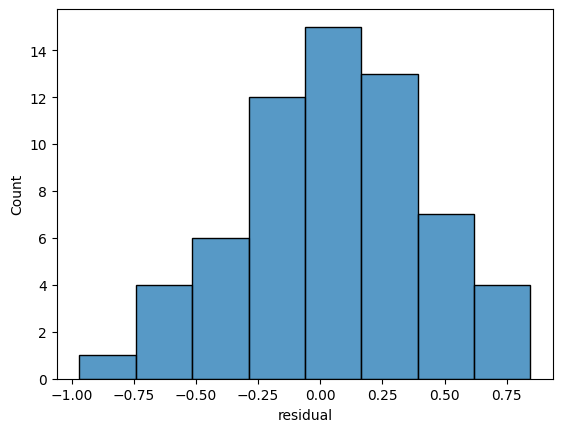

In [14]:
#histograma de residuos

sns.histplot(data=resultados['residual'])

<Axes: xlabel='residual', ylabel='Density'>

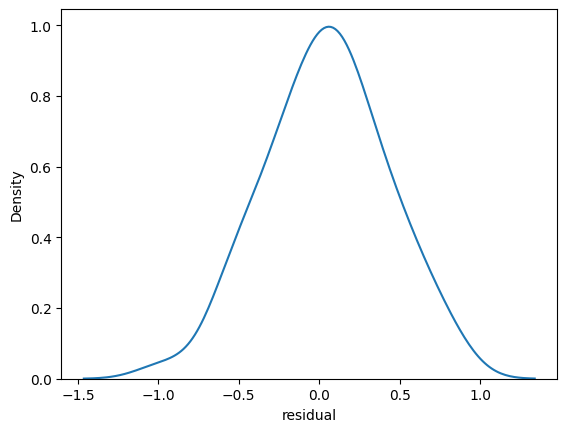

In [15]:
# Densidad de residuos

sns.kdeplot(data=resultados['residual'])

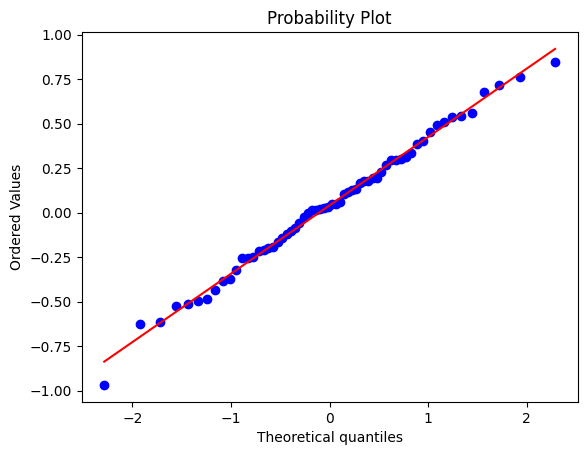

In [16]:
stats.probplot(resultados['residual'], dist="norm", plot=plt)
py.show()

In [17]:
anderson(resultados['residual'])

AndersonResult(statistic=0.11637982500721478, critical_values=array([0.544, 0.62 , 0.744, 0.868, 1.032]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=0.04082844432173305, scale=0.3768816609355783)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

Observando las gráficas y el valor-p encontrado con la prueba Anderson-Darling, encontramos que la $H_0$ no se rechaza ya que el valor del estadístico de prueba (0.11637) es menor que el valor crítico para $\alpha = 0.05$ el cual es 0.744. De todos modos, se harám las otras pruebas para seguir mostrando que la $H_0$ no debe ser rechazada.

In [18]:
from statsmodels.stats import weightstats as stests

ztest ,propability_value = stests.ztest(resultados['residual'], x2=None, value=0)
print('valor p: ', float(propability_value))
if propability_value<0.05:
    print("Se rechaza la H0")
else:
    print("No se rechaza la H0")

valor p:  0.39365424946026306
No se rechaza la H0


Haciendo una prueba estadística de Z, vemos que el valor-p de los residuos es mayor que el del nivel de significancia. Por esto mismo, no se rechaza $H_0$, indicandonos que los residuos siguen una media de $\mu_e = 0$.

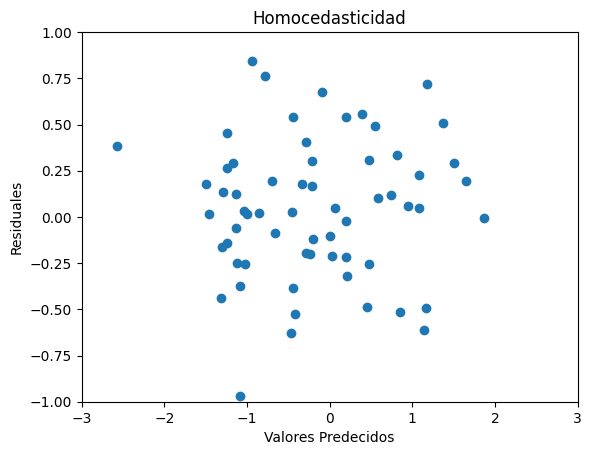

In [19]:
p = plt.scatter(predictions, resultados['residual'])
plt.xlabel('Valores Predecidos')
plt.ylabel('Residuales')
plt.ylim(-1,1)
plt.xlim(-3,3)
p = plt.title('Homocedasticidad')

Observando la gráfica anterior, vemos que no hay un sesgo en los datos, por lo que se concluye que son independientes. Igualmente, vemos que no hay variación en la separación de los datos con la media ($\mu_e = 0$) por lo que concluimos que no hay homocedasticidad en los datos.

### Conclusión

Recopilando todo, encontramos un modelo de regresión lineal para las variables de curbweight, enginesize, horsepower, citympg, highwaympg y cylindernumber en relación a la variable price. Esto dio buenos resultados al obtener una correlación de 87.59% y un error relativamente pequeño. Para poder seguir analizando el modelo, se hizo una prueba de hipótesis para los valores de los residuos para encontrar si las variables son independientes o dependientes, con lo cual se encontró que efectivamente eran independientes. Con esto, encontramos un modelo que es muy bueno para la estimación de precio bajo las variables que se mencionaron anteriormente, sin embargo, siempre hay espacio para mejorar al buscar hiperparámetros más eficientes y óptimos al seguir entrenando el modelo con nuevos valores o con una base de datos mayor. 